## Replicating Meta AI model

Meta AI: https://github.com/facebookresearch/brainmagick/tree/main

Table of contents:
1. Requirements
2. Data and studies
3. Preprocessing and cache
4. Training
5. Evaluations
6. Tests
7. Visualization of metrics


### Requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Final_project/Baseline_model2

/content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2


In [ ]:
# !git clone https://github.com/facebookresearch/brainmagick.git

Cloning into 'brainmagick'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 147 (delta 16), reused 11 (delta 11), pack-reused 68
Receiving objects: 100% (147/147), 815.84 KiB | 10.73 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
%cd /content/drive/MyDrive/Final_project/Baseline_model2/brainmagick

/content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick


In [ ]:
!ls

bm		    LICENSE				 notebook_templates
bm.egg-info	    logo.png				 outputs
brainmagick.png     Makefile				 pyproject.toml
cache		    MANIFEST.in				 README.md
CHANGELOG.md	    Miniconda3-latest-Linux-x86_64.sh	 requirements.txt
CODE_OF_CONDUCT.md  Miniconda3-latest-Linux-x86_64.sh.1  scripts
CONTRIBUTING.md     Miniconda3-latest-Linux-x86_64.sh.2  setup.cfg
data		    Miniconda3-latest-Linux-x86_64.sh.3  setup.py
doc		    mypy.ini


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

--2023-12-11 21:03:46--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120986213 (115M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh.4’

Miniconda3-latest-L 100%[===================>] 115.38M  90.0MB/s    in 1.3s    

2023-12-11 21:03:48 (90.0 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh.4’ saved [120986213/120986213]

PREFIX=/usr/local
Unpacking payload ...
                                                                                 
Installing base environment...





Preparing transaction: - \ | / done
Executing transaction: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
installation finished.
    You currently have a PYTHONPATH envi

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [ ]:
# originally Meta AI had this line but it didn't work, so I replaced it with explicit package versions
# !conda install pytorch torchaudio cudatoolkit=11.3 -c pytorch -y

In [ ]:
!conda create -n bm ipython python=3.8 -y
!conda activate bm
!conda install pytorch=1.11.0 torchvision=0.12.0 torchaudio=0.11.0 cudatoolkit=11.3 -c pytorch
!pip install -U -r requirements.txt
!pip install -e .
!python -m spacy download en_core_web_md

Channels:
 - defaults
Platform: linux-64
Solving environment: | done

## Package Plan ##

  environment location: /usr/local/envs/bm

  added / updated specs:
    - ipython
    - python=3.8


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    asttokens-2.0.5            |     pyhd3eb1b0_0          20 KB
    backcall-0.2.0             |     pyhd3eb1b0_0          13 KB
    decorator-5.1.1            |     pyhd3eb1b0_0          12 KB
    executing-0.8.3            |     pyhd3eb1b0_0          18 KB
    ipython-8.12.2             |   py38h06a4308_0         1.1 MB
    jedi-0.18.1                |   py38h06a4308_1         982 KB
    matplotlib-inline-0.1.6    |   py38h06a4308_0          16 KB
    parso-0.8.3                |     pyhd3eb1b0_0          70 KB
    pexpect-4.8.0              |     pyhd3eb1b0_3          53 KB
    pickleshare-0.7.5          |  pyhd3eb1b0_1003          13 KB
    pip-23.3

Obtaining file:///content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for bm (pyproject.toml) ... done
  Created wheel for bm: filename=bm-0.1.0-0.editable-py3-none-any.whl size=14592 sha256=3feb6c2c5c1332d237a330a6463ffd011dad034b64924ef680c8651ce7f48b76
  Stored in directory: /tmp/pip-ephem-wheel-cache-594y1dn2/wheels/a1/4f/e5/81dabfcd2e262ef95d8ae08ccfcfda8559f252de2c8ef4bcf4
Successfully built bm
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.3.1/en_core_web_md-2.3.1.tar.gz#egg=en_core_web_md==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remov

### Data and studies

* `broderick2019`: EEG
* `brennan2019`: EEG
  * Version 1 (2019): used in Meta AI study, available at: `./data/brennan2019/`
  * Version 2 (2023): updated version: https://deepblue.lib.umich.edu/data/concern/data_sets/bn999738r?locale=en
* `audio_mous`: MEG
* `gwilliams2022`: MEG, available at: `./data/gwilliams2022/` -- it's a default dataset used in `dora run ...`. If we want to use a different dataset, we need to overwrite the default version.

### Preprocessing and cache

Key code:
* `!dora run download_only=true` - downloads and preprocesses the default dataset (gwilliams2022).
* `!dora run download_only=true 'dset.selections=[brennan2019]'` - downloads and preprocesses a selected dataset.



In [ ]:
#!dora run download_only=true

In [ ]:
!dora run download_only=true 'dset.selections=[brennan2019]'

Hostname 80122e6600e3 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
/usr/local/lib/python3.11/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[2023-12-11 21:09:35,144][bm._env][WARNING] - Hostname 80122e6600e3 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
[2023-12-11 21:09:35,789][bm.train][INFO] - For logs, checkpoints and samples, check /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick/outputs/xps/0dda2bc3.
[2023-12-11 21:09:35,790][bm.train][INFO] - Caching intermediate data under /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick/cache.
[12-11 21:09:35][dora.distrib][INFO] - world_size is 1, s

### Training

Key code:
* `!dora run dset.n_recordings=1` - runs a training on the default dataset (gwilliams2022) using just 1 recording.
* `!dora run 'dset.selections=[brennan2019]'` - runs a training on a selected dataset using all recordings. --> run; all subjects (get stuck on the normalization part for 6 hours).

In [ ]:
!dora run 'dset.selections=[brennan2019]' dset.n_recordings=20 +simple.merger_if_fig=True +simple.merger_fig_path='/content/drive/MyDrive/Final_project/Baseline_model2/result.png'

Hostname 80122e6600e3 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
/usr/local/lib/python3.11/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[2023-12-11 23:03:29,217][bm._env][WARNING] - Hostname 80122e6600e3 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
[2023-12-11 23:03:29,235][bm.train][INFO] - For logs, checkpoints and samples, check /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick/outputs/xps/bb0ee826.
[2023-12-11 23:03:29,236][bm.train][INFO] - Caching intermediate data under /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick/cache.
[12-11 23:03:29][dora.distrib][INFO] - world_size is 1, s

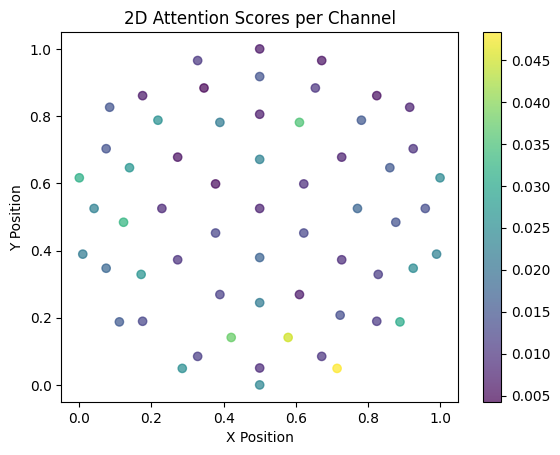

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
attention_score = torch.load('/content/drive/MyDrive/Final_project/Baseline_model2/attention.pth').numpy()
position = torch.load('/content/drive/MyDrive/Final_project/Baseline_model2/positions.pth').cpu().numpy()

areas = np.pi * (15 * np.random.rand(60))**2
plt.scatter(position[:, 0], position[:, 1], c=attention_score,cmap='viridis', alpha=0.7)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Attention Scores per Channel')
# Add colorbar for reference
plt.colorbar()
plt.savefig('output_plot.png')


In [ ]:
!dora run 'dset.selections=[brennan2019]' dset.n_recordings=20 +simple.merger_per_subject=True

Hostname d4614ef9c3c2 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
/usr/local/lib/python3.11/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[2023-12-08 02:01:25,736][bm._env][WARNING] - Hostname d4614ef9c3c2 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
[2023-12-08 02:01:25,752][bm.train][INFO] - For logs, checkpoints and samples, check /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick/outputs/xps/60e269cd.
[2023-12-08 02:01:25,753][bm.train][INFO] - Caching intermediate data under /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick/cache.
[12-08 02:01:25][dora.distrib][INFO] - world_size is 1, s

In [ ]:
!dora run 'dset.selections=[brennan2019]' dset.n_recordings=20

Hostname fbaccbc9deca not defined in /conf/study_paths/study_paths.yaml. Using default paths.
/usr/local/lib/python3.11/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[2023-12-07 23:11:32,843][bm._env][WARNING] - Hostname fbaccbc9deca not defined in /conf/study_paths/study_paths.yaml. Using default paths.
[2023-12-07 23:11:32,845][bm.train][INFO] - For logs, checkpoints and samples, check /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick/outputs/xps/9d3a672f.
[2023-12-07 23:11:32,845][bm.train][INFO] - Caching intermediate data under /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model2/brainmagick/cache.
[12-07 23:11:32][dora.distrib][INFO] - world_size is 1, s

In [ ]:
!dora run 'dset.selections=[brennan2019]' dset.n_recordings=20 simpleconv.subject_layers=true

Hostname 4fb700a75f98 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
a
/usr/local/lib/python3.11/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[2023-12-07 01:34:10,053][bm._env][WARNING] - Hostname 4fb700a75f98 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
[2023-12-07 01:34:10,054][bm.train][INFO] - For logs, checkpoints and samples, check /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model/brainmagick/outputs/xps/1f75090d.
[2023-12-07 01:34:10,055][bm.train][INFO] - Caching intermediate data under /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model/brainmagick/cache.
[12-07 01:34:10][dora.distrib][INFO] - world_size is 1, s

In [ ]:
# see config one for change
# n_records = 20
# max_sacle = 100
# others remains the same
!dora run 'dset.selections=[brennan2019]' dset.n_recordings=20 norm.max_scale=100

Hostname 0f7c3b244a17 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
a
/usr/local/lib/python3.11/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[2023-11-16 02:14:09,016][bm._env][WARNING] - Hostname 0f7c3b244a17 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
[2023-11-16 02:14:09,018][bm.train][INFO] - For logs, checkpoints and samples, check /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model/brainmagick/outputs/xps/d4b29771.
[2023-11-16 02:14:09,018][bm.train][INFO] - Caching intermediate data under /content/drive/.shortcut-targets-by-id/1vmzRyDN2H7gN5AacMSG-aJKQHDWqIxiB/Final_project/Baseline_model/brainmagick/cache.
[11-16 02:14:09][dora.distrib][INFO] - world_size is 1, s

### Evaluations

Key code:
* `!dora grid nmi.main_table --dry_run --init` - shows a full list of all possible experiments per each study; each experiment has its own signature; we pass it when we want to start the experiment.
* `!dora grid nmi.main_table '!seed' '!features' '!wer_random' --dry_run --init'` - shows a signature for each study.
* `!dora run -f 6e3bf7d7 -d` - command to run a specific experiment.

In [ ]:
!dora grid nmi.main_table --dry_run --init

Hostname 2e465021a4a5 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
a
Monitoring Grid nmi.main_table
Base name:  model=clip_conv
                                                                     Meta                                                                     | trai | vali |    test  
in  name                                                                                                                   sta       sig  sid | e  l | l  b | wer  wer_
 0  dse.force_uid_assignement dse.selections=['audio_mous']                                                                N/A  34219380      | 0    |      |          
 1  dse.force_uid_assignement dse.selections=['audio_mous'] opt.epochs=1 opt.max_batches=1 tes.wer_random                  N/A  bcd967bc      | 0    |      |          
 2  dse.features=['MelSpectrum'] dse.force_uid_assignement dse.selections=['audio_mous']                                   N/A  029557fd      | 0    |      |          
 3  f

In [ ]:
!dora grid nmi.main_table '!seed' '!features' '!wer_random' --dry_run --init

Hostname 2e465021a4a5 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
a
Monitoring Grid nmi.main_table
Base name:  model=clip_conv
                                     Meta                                      | trai | vali |    test  
i  name                                                     sta       sig  sid | e  l | l  b | wer  wer_
0  dse.force_uid_assignement dse.selections=['audio_mous']  N/A  34219380      | 0    |      |          
1  dse.selections=['gwilliams2022']                         N/A  52345878      | 0    |      |          
2  dse.selections=['broderick2019'] tes.wer_recordings=100  N/A  557f5f8a      | 0    |      |          
3                                                           N/A  6e3bf7d7      | 0    |      |          


In [ ]:
!dora run -f 6e3bf7d7

Hostname 2e465021a4a5 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
a
Parser Injecting argv ['model=clip_conv', 'dset.selections=["brennan2019"]', 'seed=2036'] from sig 6e3bf7d7
/usr/local/lib/python3.11/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[2023-11-14 09:21:46,695][bm._env][WARNING] - Hostname 2e465021a4a5 not defined in /conf/study_paths/study_paths.yaml. Using default paths.
[2023-11-14 09:21:47,196][bm.train][INFO] - For logs, checkpoints and samples, check /content/drive/MyDrive/11785 _DL/Final_project/Baseline_model/brainmagick/outputs/xps/6e3bf7d7.
[2023-11-14 09:21:47,197][bm.train][INFO] - Caching intermediate data under /content/drive/MyDrive/11785 _DL/Final_project/Baseline_model/brainmagick/cache.
[11-14 09:21:47][dora.distrib

In [ ]:
!dora run -f 6e3bf7d7 -d

Hostname d236674f7fcb not defined in /conf/study_paths/study_paths.yaml. Using default paths.
a
Parser Injecting argv ['model=clip_conv', 'dset.selections=["gwilliams2022"]', 'seed=2036'] from sig 6e3bf7d7
Executor: Starting 1 worker processes for DDP.
Hostname d236674f7fcb not defined in /conf/study_paths/study_paths.yaml. Using default paths.
a
/usr/local/lib/python3.11/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
[2023-11-11 22:00:56,660][bm._env][WARNING] - Hostname d236674f7fcb not defined in /conf/study_paths/study_paths.yaml. Using default paths.
[2023-11-11 22:00:56,662][bm.train][INFO] - For logs, checkpoints and samples, check /content/drive/MyDrive/11785 _DL/Final_project/Baseline_model/brainmagick/outputs/xps/6e3bf7d7.
[2023-11-11 22:00:56,662][bm.train][INFO]

KeyboardInterrupt: ignored

In [ ]:
!python -m scripts.run_eval_probs grid_name="main_table"

Hostname d236674f7fcb not defined in /conf/study_paths/study_paths.yaml. Using default paths.
a
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/content/drive/MyDrive/11785 _DL/Final_project/Baseline_model/brainmagick/scripts/run_eval_probs.py", line 471, in <module>
    assert grid_dir.exists(), f"{grid_dir} does not exists"
AssertionError: /content/drive/MyDrive/11785 _DL/Final_project/Baseline_model/brainmagick/outputs/grids/main_table does not exists
